In [1]:
import fastai
from fastai.vision import *
import numpy as np

In [3]:
path = ('../input/animals')
print(path)
for folder in ('ants','cats','dogs','lions','spiders'):
    print(folder)
verify_images(os.path.join(path,folder), delete=True, max_size=500)

../input/animals
ants
cats
dogs
lions
spiders


OSError: [Errno 30] Read-only file system: '../input/animals/spiders'

In [4]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=path, valid_pct=0.2, ds_tfms=get_transforms(),
                                 size=224, num_workers=0).normalize(imagenet_stats)

In [5]:
data.classes

['ants', 'cats', 'dogs', 'lions', 'spiders']

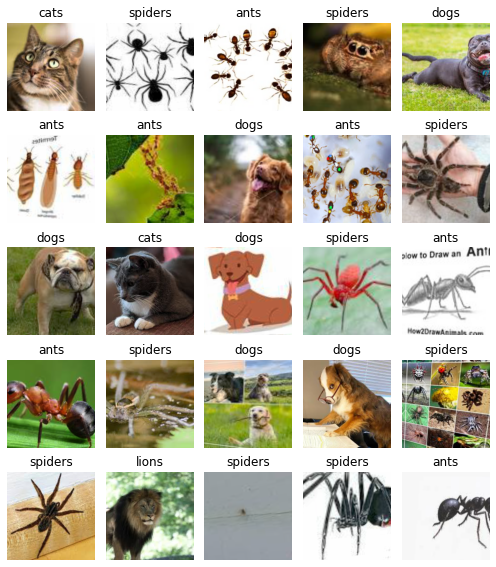

In [6]:
data.show_batch(figsize=(7, 8))

In [7]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

/opt/conda/lib/python3.7/site-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [8]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,2.828840,1.409901,0.571429,00:23
1,2.227691,0.319556,0.114286,00:21
2,1.630688,0.304218,0.114286,00:20
3,1.264376,0.324127,0.114286,00:20
4,1.037001,0.330034,0.142857,00:20


In [9]:
learn.unfreeze()

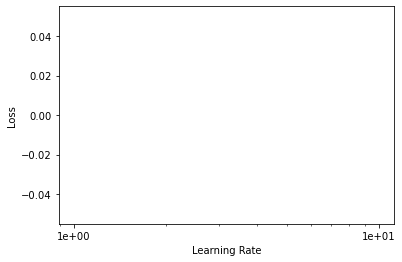

In [11]:
# learn.recorder.plot()

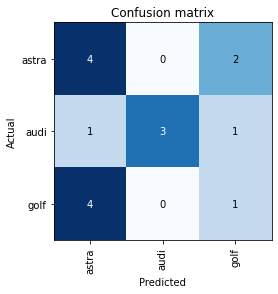

In [40]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

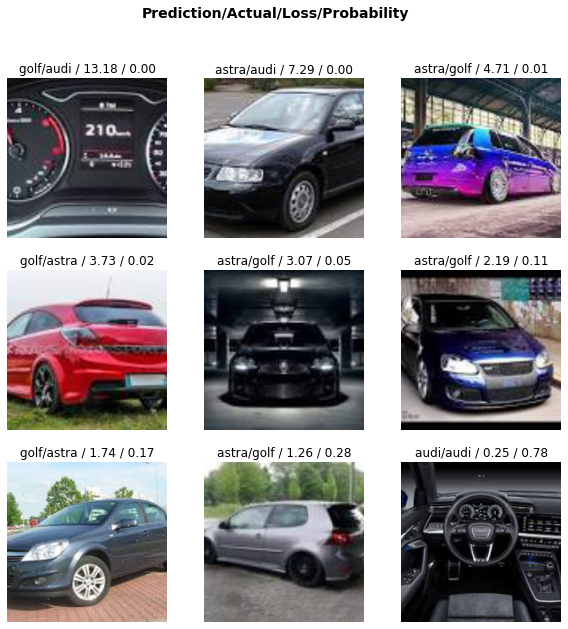

In [42]:
interp.plot_top_losses(9, figsize=(10,10))